<a href="https://colab.research.google.com/github/iamNirmeshGupta/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_Nirmesh_Gupta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## Let's start by importing required libraries

In [60]:
from pandas.errors import InvalidIndexError
# importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


from datetime import datetime
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Now Let's import the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset

file_path = "/content/drive/MyDrive/Colab Notebooks/alma better/Bike Sharing Demand Prediction - Capstone Project - Regression/Copy of SeoulBikeData.csv"
df = pd.read_csv(file_path, encoding = 'unicode_escape')

##Now let's check basic information of our data

In [4]:
# Checking basic info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
# Checking shape of our dataframe
df.shape

(8760, 14)

In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Checking descriptive statistics of our data
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


* ***As we can see there are 14 variables in our dataframe and "Rented Bike Count" is our target variable. There are 8760 rows which represent observations for each hour of each day of the year ***
##Now let's check if our data has any null values


In [8]:
# Checking the null values

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# Checking for duplicate data

len(df[df.duplicated()])

0

###By the grace of God and whoever collected and entered this data, we don't have any null values in any of our columns. And also, there are no duplicate rows in the data. So we can go on then..

###We need to change names of a few variables to make them easier to type

In [10]:
# Renaming few columns
df=df.rename(columns={'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew point temperature',
                                'Solar Radiation (MJ/m2)':'Solar Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall'})
                                
                                

###Now let's convert our date column to datetime and form three separate columns - Day, Month and Year

In [11]:
# Converting date column to datetime
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [12]:
# Creating new columns from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()

In [13]:
# Checking unique values in Year column
df['Year'].unique()

array([2017, 2018])

In [14]:
# Checking unique value in Month Column

df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [15]:
# Checking unique values in Day column
df['Day'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

###***As we can see from the "month" column that all the observations are distributed over a whole year from January to December. So we have data for one year only and the year column won't be needed in our analysis and we can drop it***

###Also we can divide our "Day" column into two categories of weekend and weekday to analyse the bike sharing demand for weekdays and weekends and then we can drop the "Day" column as well

In [16]:
# Categorizing days of the week into weekday and weekend

df['weekday_weekend'] = df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [17]:

# Dropping columns
df = df.drop(['Day','Year','Date'],axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  weekday_weekend        8760 non-null   int64  
dtypes: f

***Here we can see that some of our categorical columns like 'Hour', 'Month' and 'weekday_weekend' have data types as 'int'. So we have to change their data types to categorical for further analysis.***

In [19]:
# Changing data types to categorical
columns=['Hour','Month','weekday_weekend']
for i in columns:
  df[i]=df[i].astype('category')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented Bike Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew point temperature  8760 non-null   float64 
 7   Solar Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  weekday_weekend        8760 non-null   c

#**Exploratory Data Analysis(EDA)**

***EDA is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.***

***We will be doing Univariate and Multivariate analysis with graphical representation to understand the variable trends and understanding relationship between variables.***

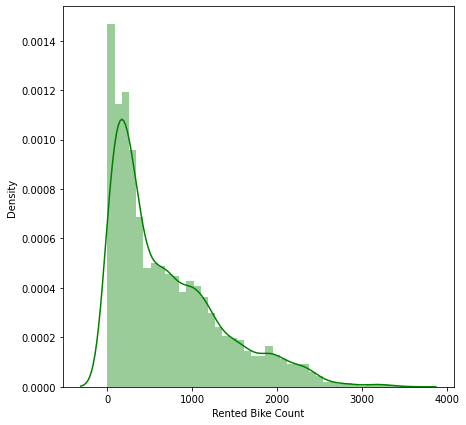

In [21]:
# Checking for the distribution of our dependent variable

plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'], color = 'g')

###As we can see our dependent variable data is right skewed.Since the assumption of Linear regression for the dependent variable's distribution is to be normal, we wil have to transform it.
**To deal with it, Let's take a log of Rented Bike Count and draw the plot. It will give us more clarification about data and we can visualize in a better way...**

Text(0.5, 0, 'Rented Bike Count')

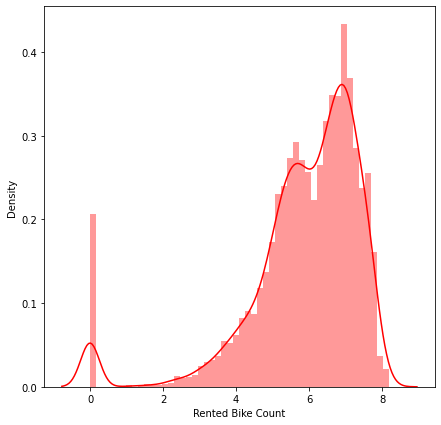

In [22]:
plt.figure(figsize=(7,7))
sns.distplot(np.log1p(df['Rented Bike Count']), color = 'r')
plt.xlabel('Rented Bike Count')

***As we can see, the log transform has converted it from right skewed to left skewed. So we have over transformed it. Let's try square root transformation***

Text(0.5, 0, 'Rented Bike Count')

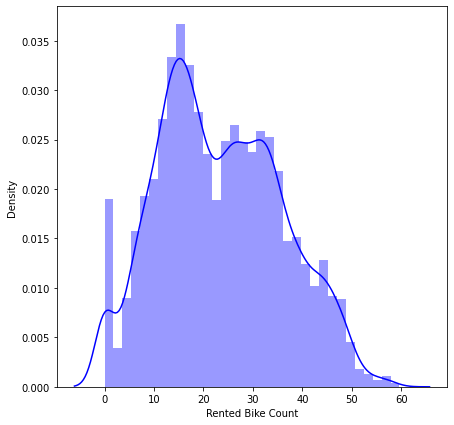

In [23]:
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Rented Bike Count']), color = 'b')
plt.xlabel('Rented Bike Count')

***As we can see, the square root transformation gives our dependent variable a better normal distribution.***

##***Analysing Categorical Variables***

In [24]:
# Listing categorical features

categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Month',
       'weekday_weekend'],
      dtype='object')

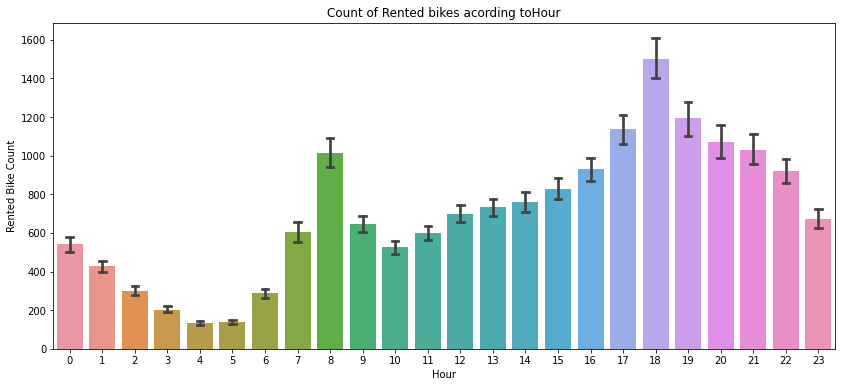

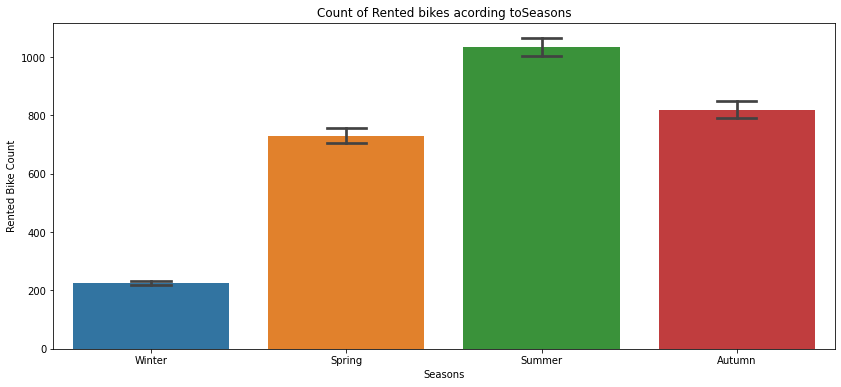

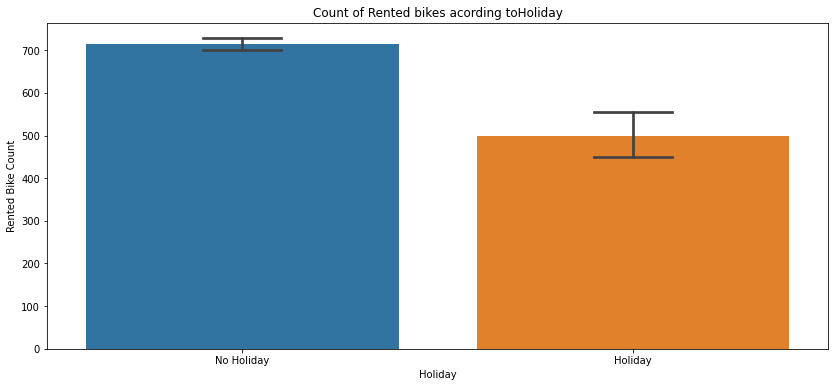

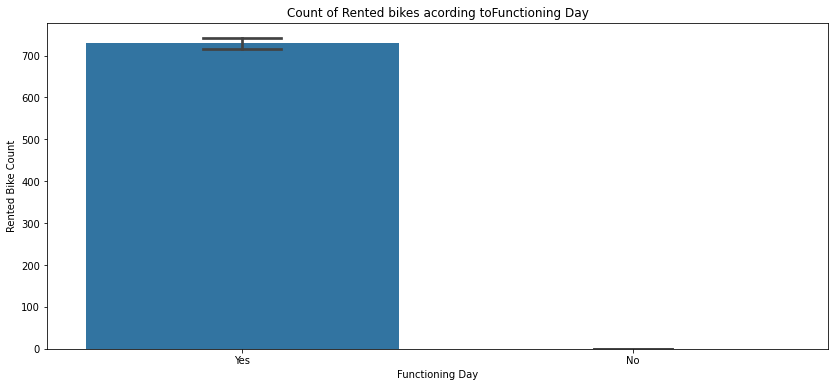

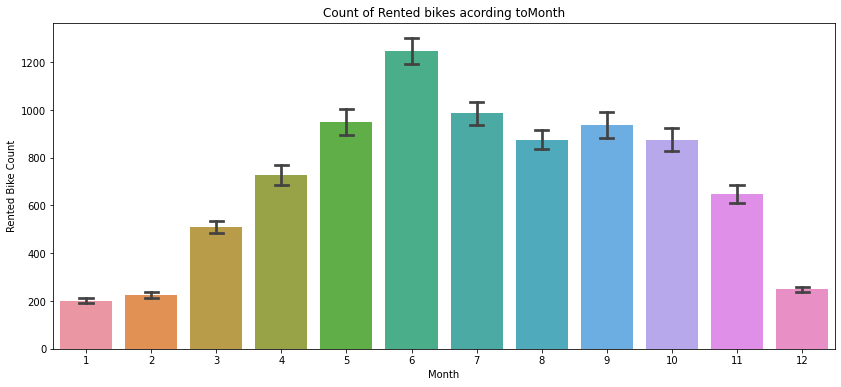

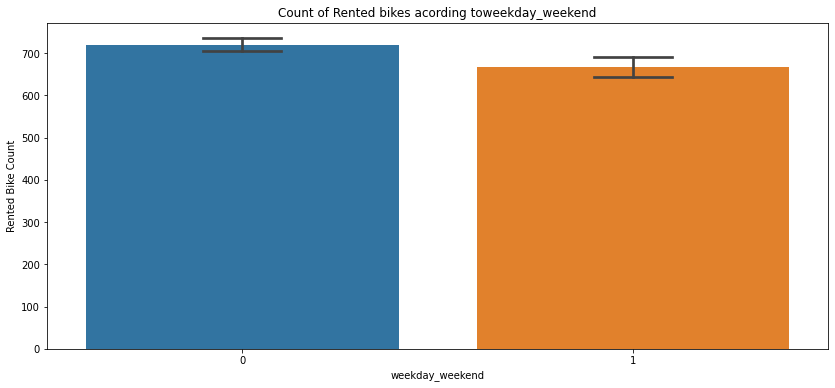

In [25]:
for col in categorical_features:
  fig,ax=plt.subplots(figsize=(14,6))
  sns.barplot(data=df,x=col,y='Rented Bike Count',ax=ax,capsize=.2)
  ax.set(title='Count of Rented bikes acording to' + col)
plt.show()

***From the above plots we can say that,***
******

*   ***Hour : People rent bikes during work going hours(7pm to 9pm) and then during later parts of the day(from 3pm to 10pm) mostly.***
*   ***Season : People don't prefer renting bikes during winter season and mostly rent bikes in summer season.***


*   ***Holiday : More number of bikes are rented by people on working days o commute to work***

*   ***Functioning Day : Close to zero percentage of bikes were rented on non-functioning days***
*   ***Month : Most of the bike rentals were from month April to October which is agian due to winter season from November to February***


*   ***Weekday_weekend : Bike rentals are almost same on weekdays and weekends***





[Text(0.5, 1.0, 'Hourly Count of Rented bikes acording to weekdays_weekend ')]

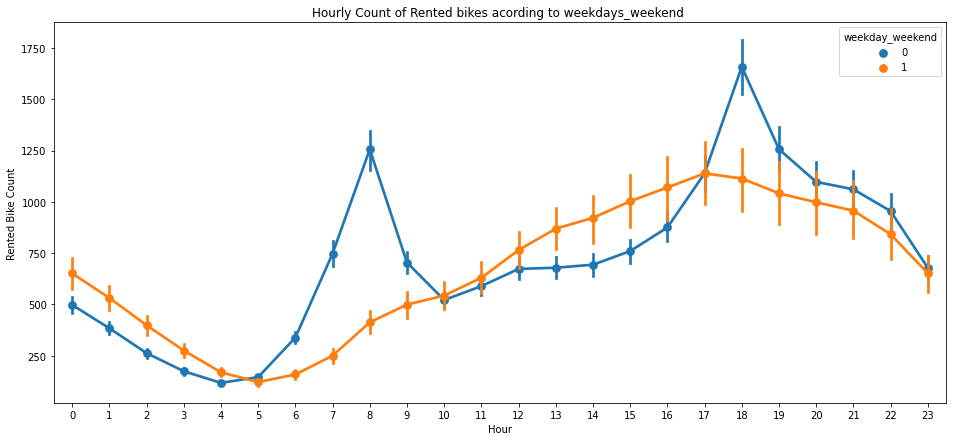

In [26]:
# Hourly count of rented bikes with respect to Weekday_weekend

fig,ax=plt.subplots(figsize=(16,7))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='weekday_weekend',ax=ax)
ax.set(title='Hourly Count of Rented bikes acording to weekdays_weekend ')

***Here again we can see during weekdays more bikes are rented at working hours as compared with weekends***

[Text(0.5, 1.0, 'Hourly Count of Rented bikes acording to seasons ')]

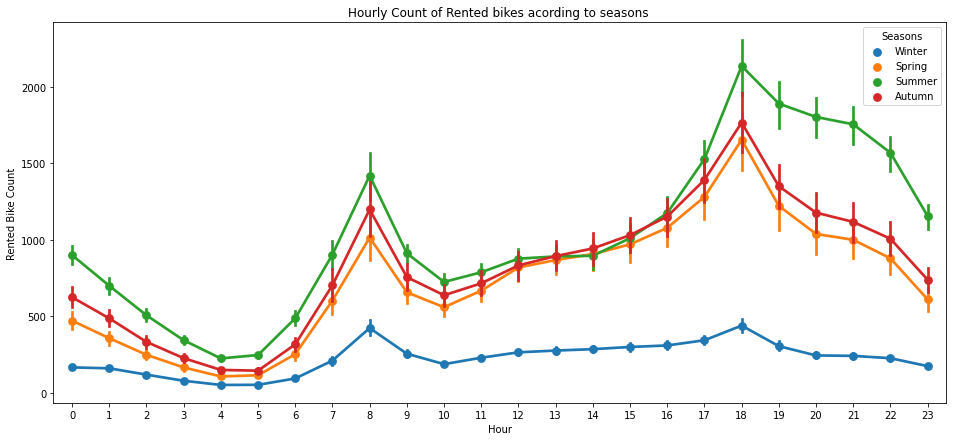

In [27]:
# Plotting hourly rental bike count for different seasons
fig,ax=plt.subplots(figsize=(16,7))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Hourly Count of Rented bikes acording to seasons ')

***Here again we can see that very low number of bikes are rented during winter season due to snowfall not even during the peak hours***

##***Analysing Numerical Variables***

In [28]:
numerical_features = df.describe().columns
numerical_features

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

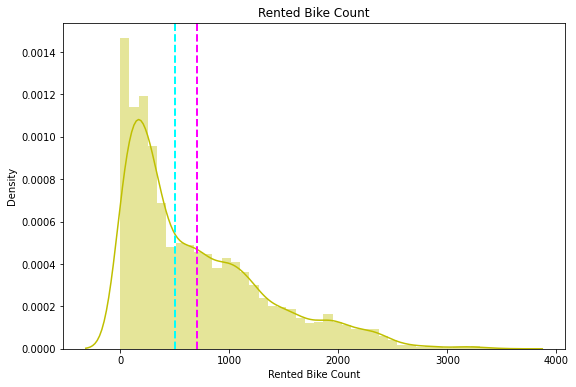

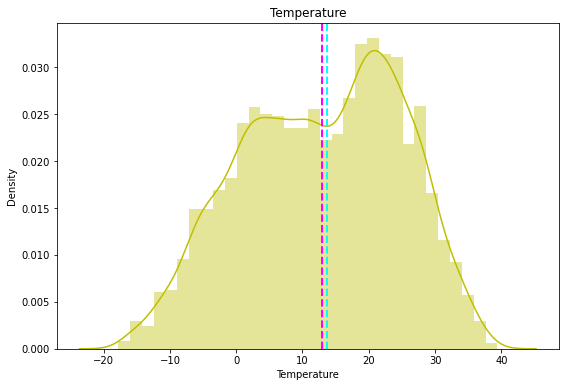

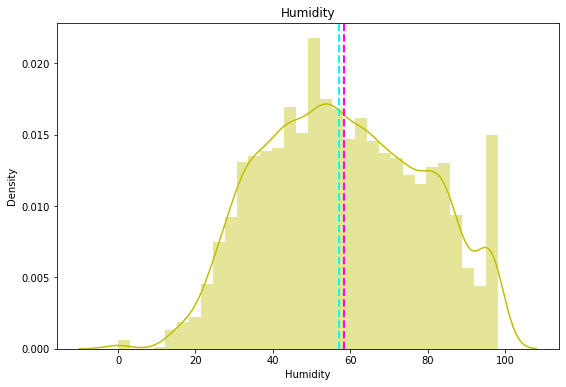

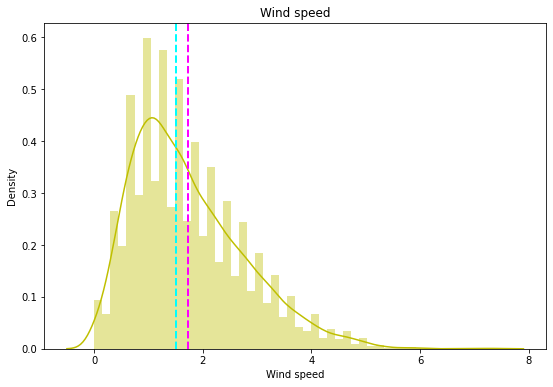

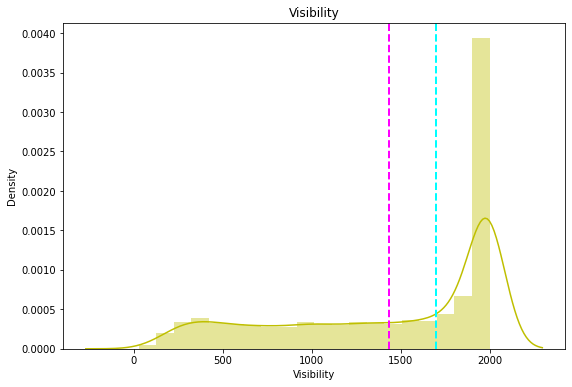

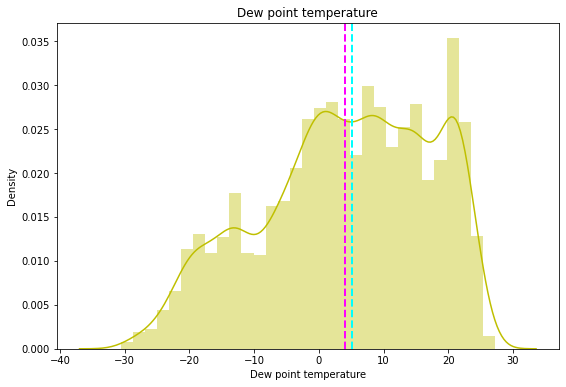

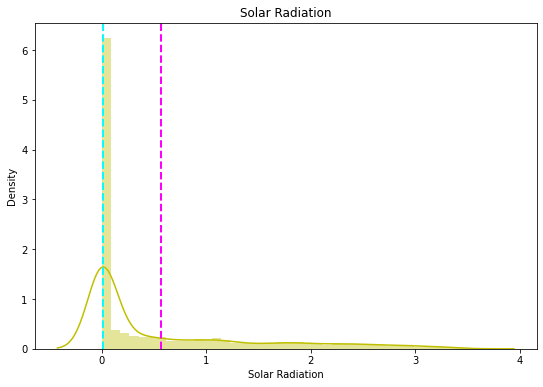

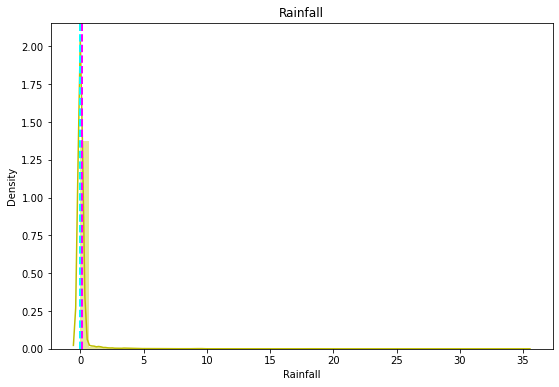

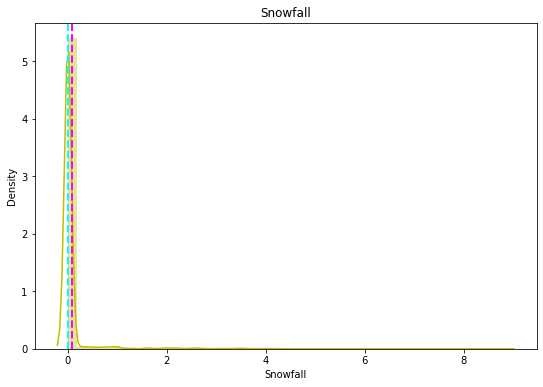

In [29]:
# Plotting distribution of all the numerical features

for col in numerical_features[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature,color = 'y')
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##***From the above plots, we can see that most of our numerical features are skewed.***
##***Let's check for the measure of skewness and kurtosis for a better understanding***

In [30]:
# Checking the level of skewness of numerical variables

df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Rented Bike Count,1.153428,0.853387
Temperature,-0.198326,-0.837786
Humidity,0.059579,-0.803559
Wind speed,0.890955,0.727179
Visibility,-0.701786,-0.961980
Dew point temperature,-0.367298,-0.755430
Solar Radiation,1.504040,1.126433
Rainfall,14.533232,284.991099
Snowfall,8.440801,93.803324


##As a rule of thumb, skewness can be interpreted like this:
##***Skewness***

***-0.5 to 0.5 :-
 Fairly symmetrical*** \
***-0.5 to -1.0 & 0.5 to 1.0 :- Moderate Skewed*** \
***<-1.0 & >1.0 :- Highly Skewed***






##Skewness in our numerical variables:

***Rented Bike Count :- Positive skewed(High)*** \
***Temperature :- Fairly Symmetrical*** \
***Humidity :- Fairly Symmetrical*** \
***Wind Speed :- Positive Skewed(Moderate)*** \
***Visibility :- Negative Skewed(Moderate)*** \
***Dew Point Temperature :- Fairly Symmetrical*** \
***Solar Radiation :- positive Skewed(High)*** \
***Rainfall and Snowfall : positive skewed(HIgh)***



##***Regression Plot***

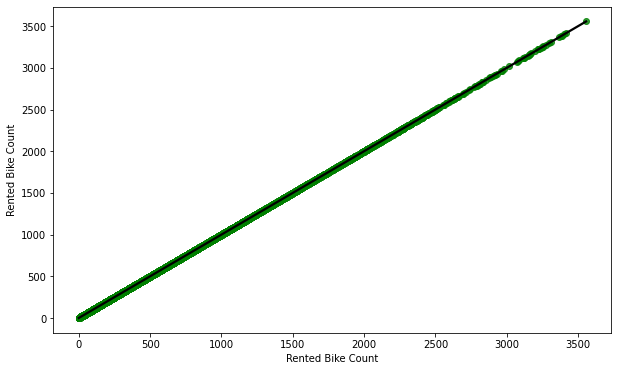

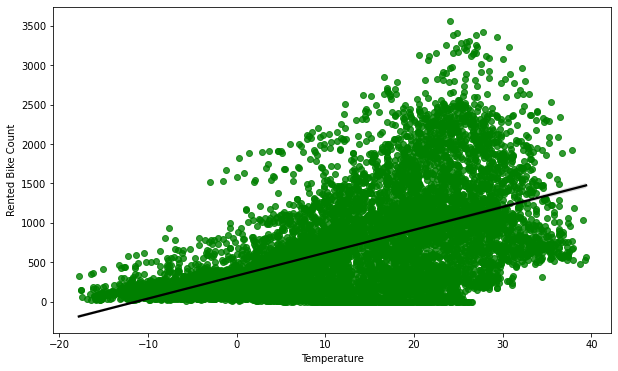

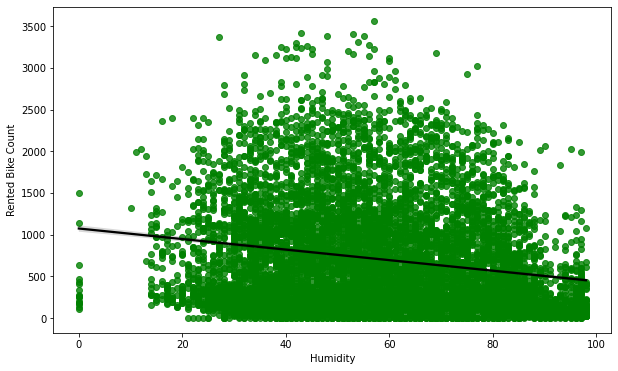

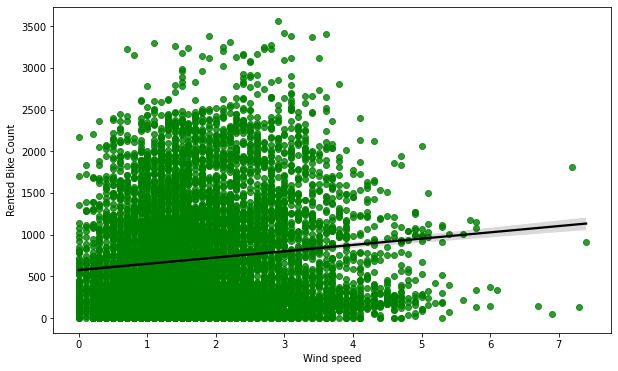

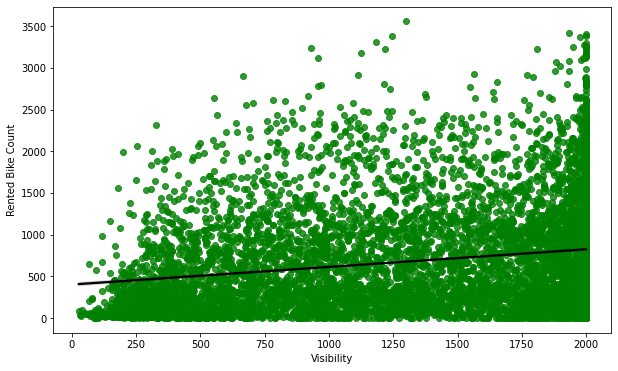

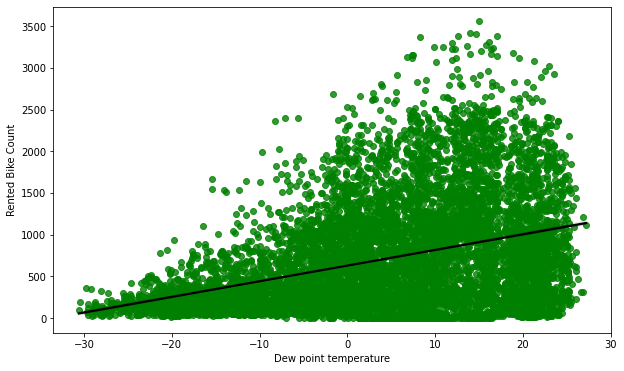

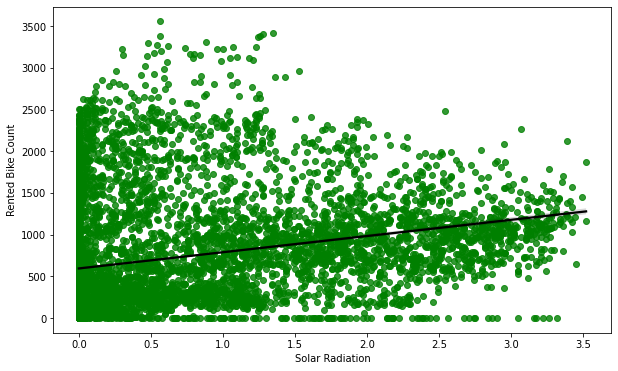

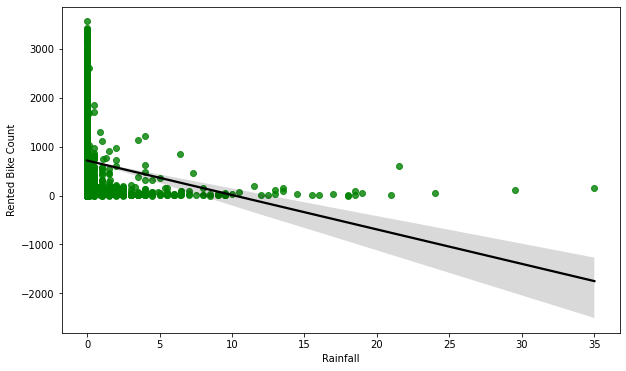

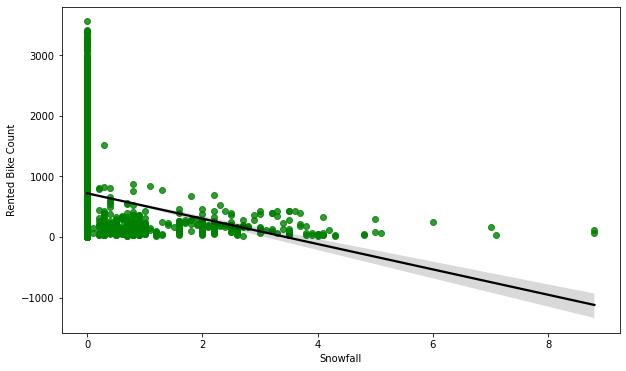

In [31]:
#Analyzing relation between depepndent variable and numerical Features through regression plot

for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'green'}, line_kws={"color": "black"})

* ***From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively related to the dependent variable.***


* ***which means the rented bike count increases with increase of these features.***
* ***'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.***

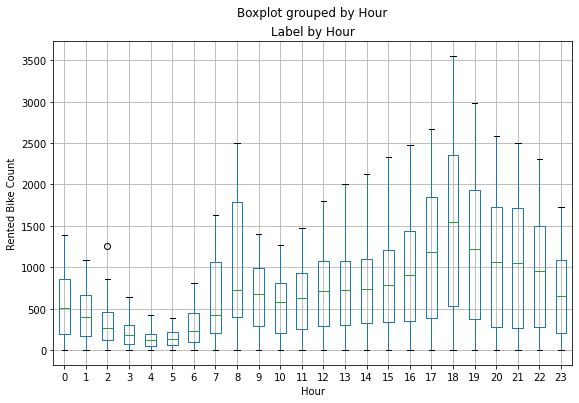

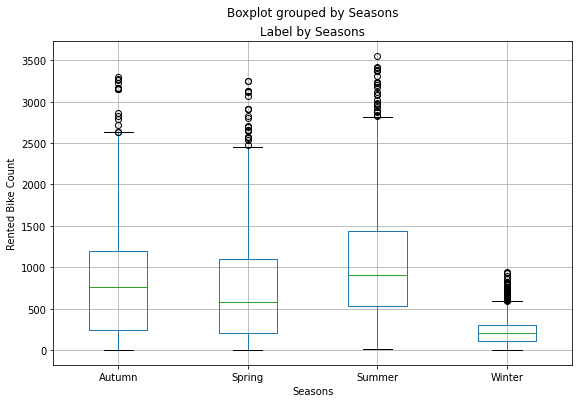

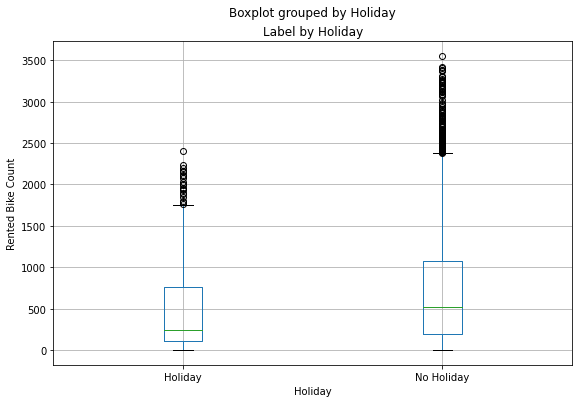

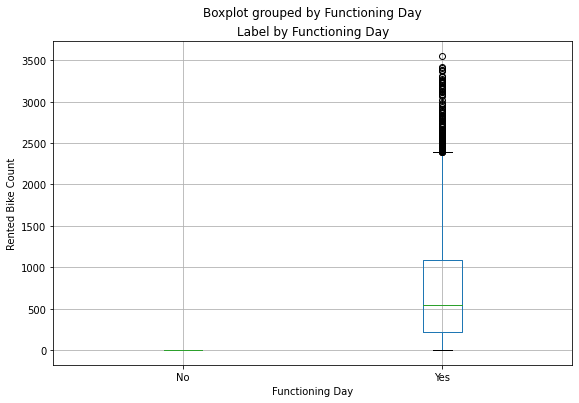

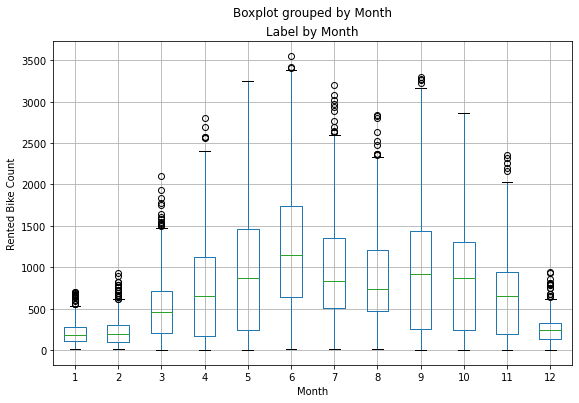

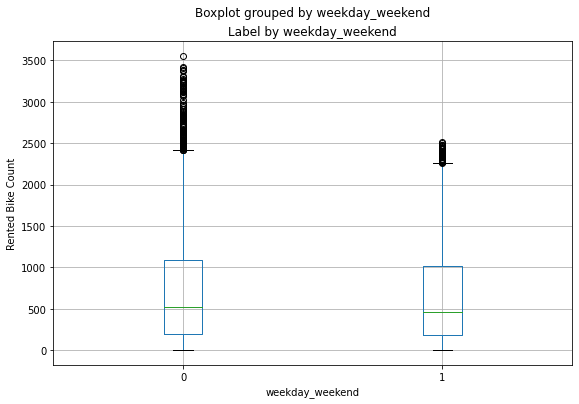

In [32]:
# Plotting boxplot for our Target variable by each categorical variable
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

###**Here we can see there are many outliers in our Dependent variable which we will remove by applying transformation later.**

##***Checking correlation between numerical features***

In [33]:
#Getting the correlation

df.corr()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


##***Correlation Heatmap***

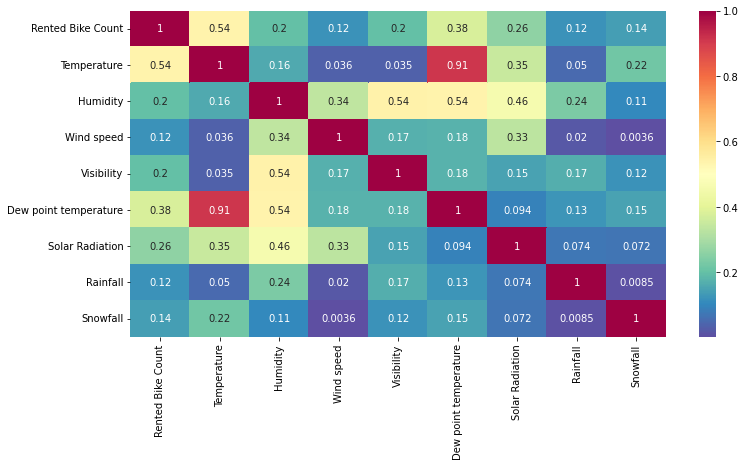

In [34]:
# Plotting the heatmap

plt.figure(figsize=(12,6))
sns.heatmap(abs(df.corr()), annot=True, cmap='Spectral_r')

***As we can Rented Bike Count is positively correlated with temperature***
***And temperature is highly correlated with Dew Point Temperature. As both of these are measures of temperature, we can remove any one of these. Since Dew Point Temperature is not much correlated with our dependent variable, so we can drop it.***

***Apart from these, no other independent features seem much much correlated to one another.***

***To be sure let's check total correlation through Variance Inflation Factor***

In [35]:
# Dropping Dew Point Temperature

df = df.drop(['Dew point temperature'], axis = 1)

In [36]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [37]:
calc_vif(df[[i for i in df.describe().columns if i != 'Rented Bike Count']])

,variables,VIF
0,Temperature,3.166007
1,Humidity,4.758651
2,Wind speed,4.079926
3,Visibility,4.409448
4,Solar Radiation,2.246238
5,Rainfall,1.078501
6,Snowfall,1.118901


***As we can see that none of the VIF value is high. So there is no multicolinearity in our independent variables***

#***Data Preparation***

In [38]:
# Checking categorical features
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Month',
       'weekday_weekend'],
      dtype='object')

In [39]:
# Creating a copy of our dataframe

df1 = df.copy()

## **Feature Engineering**

---
***Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.***




We shall convert categorical features to numeric type...

In [40]:
# Converting categorical variables to numbers

df1 = pd.get_dummies(df1, columns = ['Hour','Seasons','Holiday','Functioning Day','Month'], prefix = ['Hour','Seasons','Holiday','Functioning_Day','Month'], drop_first = True)
df1.head()



,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,weekday_weekend,Hour_1,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


###**Declaring dependent and independent variables:**

In [41]:
# Declaring x variable

x = df1.drop(['Rented Bike Count'], axis =1)

###As we can see that the values in our independent variables are at different scales so we'll need to normalise them.

***Normalisation is a technique whose goal is to change the values of numeric columns in the dataset to use a same scale, without losing information.***


In [42]:
# Normalising indpendent variables

scaler = MinMaxScaler()

x = scaler.fit_transform(x)
print(x)

[[0.22027972 0.37755102 0.2972973  ... 0.         0.         1.        ]
 [0.21503497 0.3877551  0.10810811 ... 0.         0.         1.        ]
 [0.20629371 0.39795918 0.13513514 ... 0.         0.         1.        ]
 ...
 [0.35664336 0.39795918 0.04054054 ... 0.         1.         0.        ]
 [0.3479021  0.41836735 0.13513514 ... 0.         1.         0.        ]
 [0.34440559 0.43877551 0.17567568 ... 0.         1.         0.        ]]


In [43]:
# Normalising and Defining Dependent Variable

y = np.sqrt(df1['Rented Bike Count'])

##**Train Test Split**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. 

In [44]:
# Splitting the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 7)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7008, 47)
(1752, 47)
(7008,)
(1752,)


#**Models Implementation**

***We will be using a number of Machine Learning algorithms and evaluating there evaluation metrics to see which model fits our data best, and which gives the best accuracy in the predictions.***

###The models that we will be using are:
**Linear regression** \
**Lasso regressin** \
**Ridge regression** \
**ElasticNet** \
**Decision Tree Regressor** \
**Random Forest Regresso** \
**Gradient Boosting Regressor** 

In [45]:
# Defining the models

lin_reg = LinearRegression()
lasso = Lasso(alpha=0.1, max_iter=3000)
ridge = Ridge(alpha=0.1, max_iter=3000)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
dt_reg = DecisionTreeRegressor(max_leaf_nodes=150, random_state=7)
rf_reg = RandomForestRegressor(n_estimators=15, random_state=7)
gb_reg = GradientBoostingRegressor(n_estimators=400, max_depth=4, min_samples_split=5, learning_rate=0.1, loss='squared_error', random_state=7)




In [46]:
regressors = {'LinearRegression':lin_reg, 'Lasso':lasso, 'Ridge':ridge, 'ElasticNet':elasticnet, 'DecisionTree':dt_reg, 'RandomForest':rf_reg, 'GradientBoost':gb_reg}

In [65]:
# Defining a regression function to train and predict for all models simultaneously
def train_regressor(regressor,x_train,y_train,x_test,y_test):
  regressor.fit(x_train,y_train)
  y_pred = regressor.predict(x_test)

# Defining the evaluation metrics we will be using
  MSE = mean_squared_error((y_test), (y_pred))
  RMSE = np.sqrt(MSE)
  R2_score = r2_score((y_test), (y_pred))
  Adjusted_r2 = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

  return MSE, RMSE, R2_score, Adjusted_r2


In [66]:
# Calculating all the evaluation metrics and storing in a list
MSE = []
RMSE = []
R2_score = []
Adjusted_r2 = []

for name,reg in regressors.items():
  mse_score, rmse_score, r2, adj_r2 = train_regressor(reg,x_train,y_train,x_test,y_test)

  print("for ",name)
  print("MSE ",mse_score)
  print("RMSE ",rmse_score)
  print("R2_score ",r2)
  print("Adjusted_r2_score ",adj_r2)
  print('\v')

  MSE.append(mse_score)
  RMSE.append(rmse_score)
  R2_score.append(r2)
  Adjusted_r2.append(adj_r2)

  


for  LinearRegression
MSE  37.93610787313687
RMSE  6.159229486968063
R2_score  0.7586712955696382
Adjusted_r2_score  0.7520149287220871

for  Lasso
MSE  45.73027831926821
RMSE  6.762416603498206
R2_score  0.7090890595067176
Adjusted_r2_score  0.7010651075095438

for  Ridge
MSE  37.88446303092304
RMSE  6.155035583237764
R2_score  0.75899983172057
Adjusted_r2_score  0.7523525266095763

for  ElasticNet
MSE  68.5802265728124
RMSE  8.28131792487237
R2_score  0.5637302254700445
Adjusted_r2_score  0.5516969629096524

for  DecisionTree
MSE  22.38982573069705
RMSE  4.7317888510263275
R2_score  0.8575682130048754
Adjusted_r2_score  0.8536396367203855

for  RandomForest
MSE  13.512996867541029
RMSE  3.676002838347793
R2_score  0.9140377279102891
Adjusted_r2_score  0.9116667027998335

for  GradientBoost
MSE  11.221794403516748
RMSE  3.3498946854366554
R2_score  0.9286131009053183
Adjusted_r2_score  0.9266440960593969

